### ====Lesson25 - Data Tidying====

In [2]:
# Preparing data for practice

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#check code is check the people who alive from the titanic.
df = sns.load_dataset('titanic', cache = True)                   
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [3]:
# Preparing data for practice

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#check code is check the people who alive from the titanic.
df = sns.load_dataset('titanic', cache = True)                   
df.shape

(891, 15)

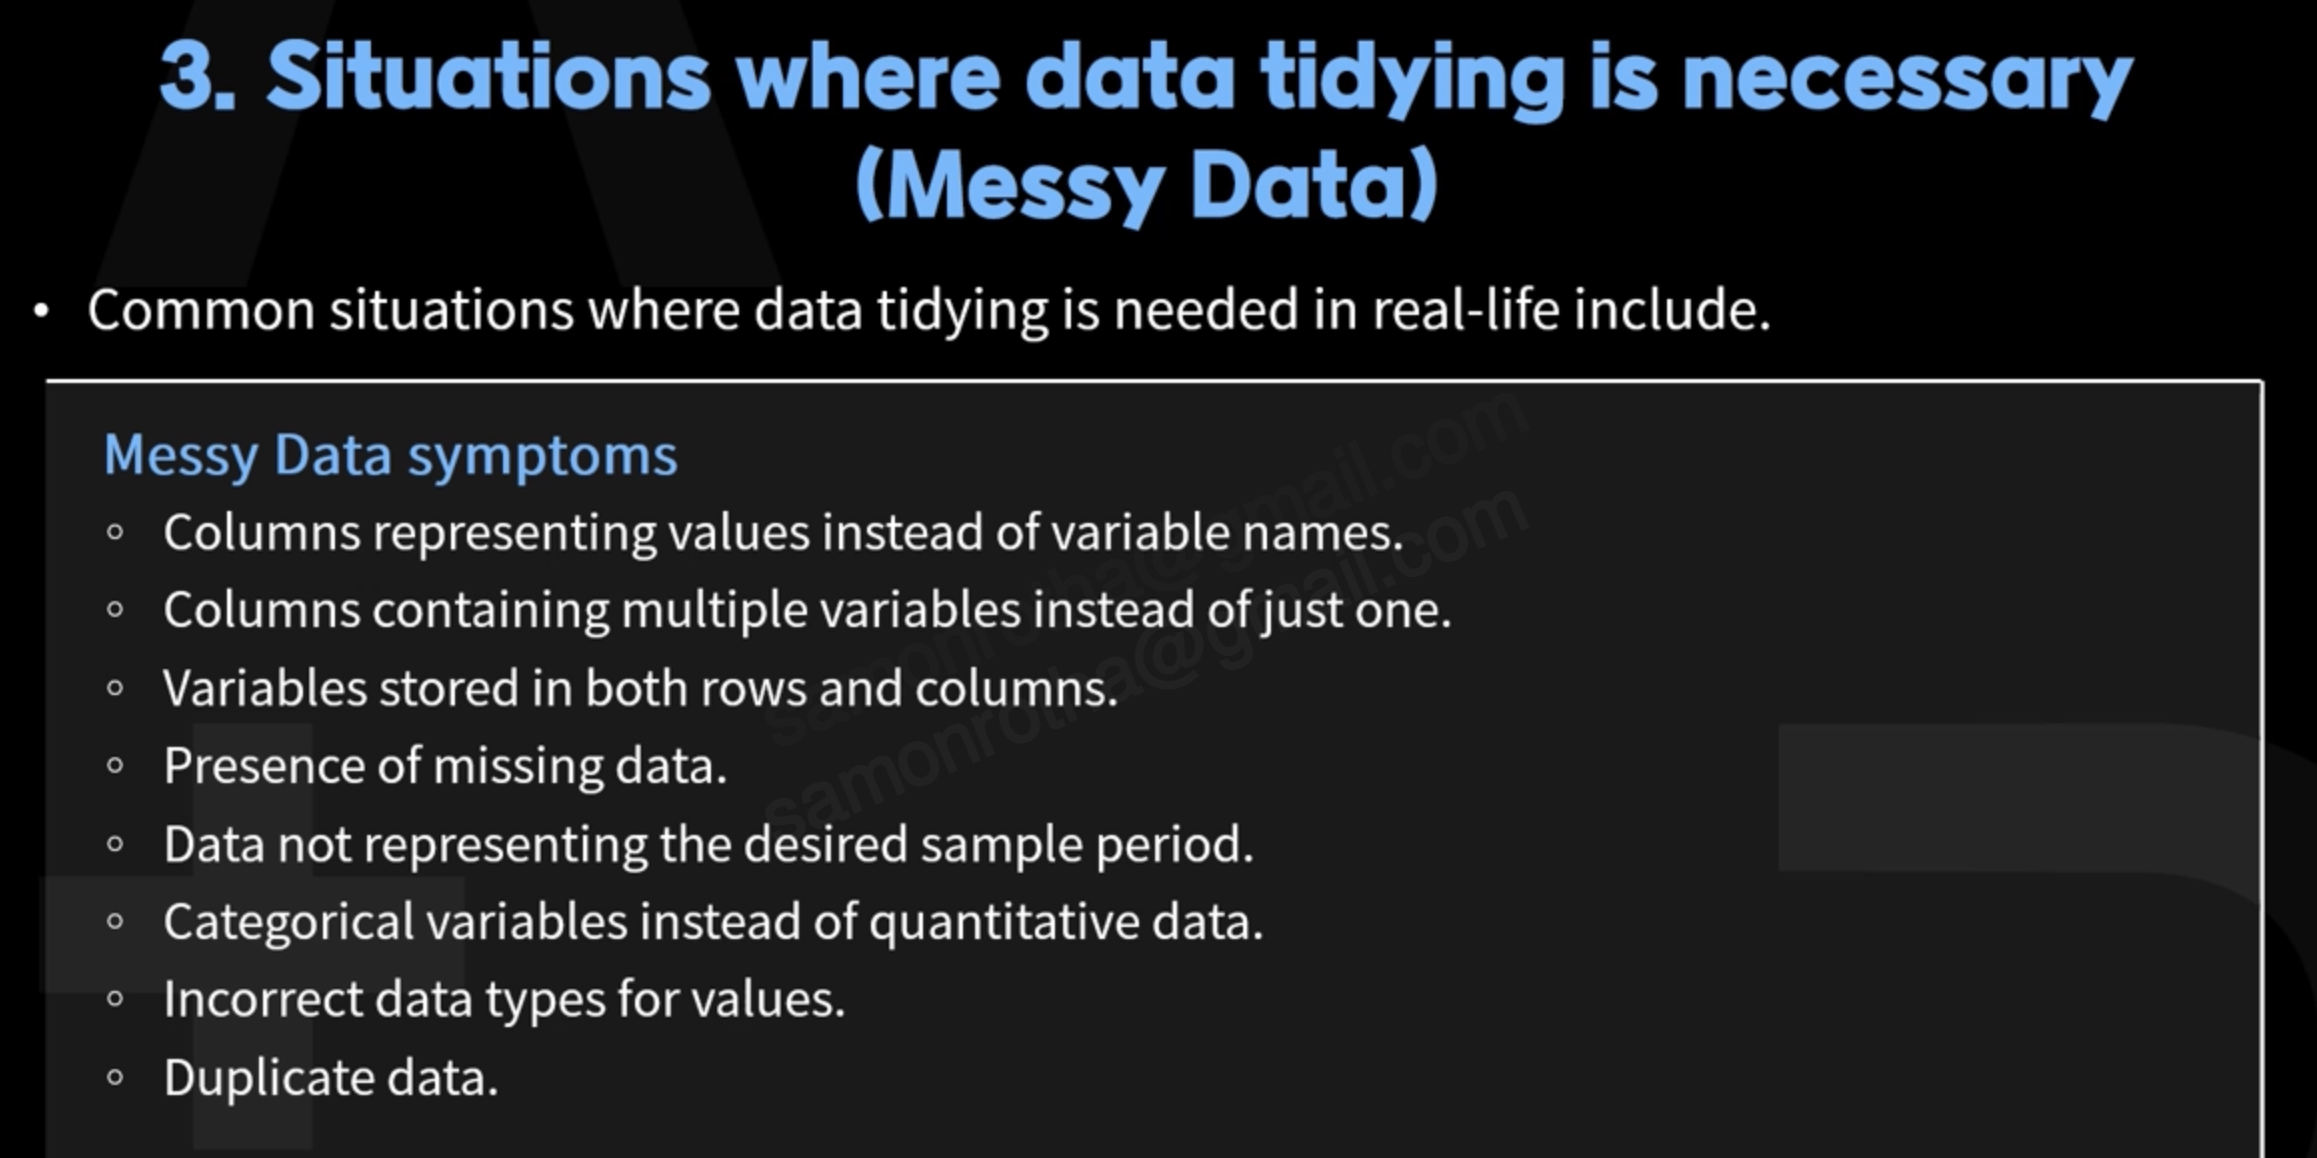

In [5]:
df.info() #we can check the number of valid values of each column in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
#When 'dropna = Flase' is set in 'df.value_counts()' the missing data (NaN value) is also included in the calculation
df['deck'].value_counts(dropna = False)

deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

In [7]:
df.isnull() #return 'true' for missing data

survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  
0    False       False   True        False  False  False  
1    False       False  False        False  False  False  
2    False       False   True        False  False  False  
3    False       False  False        False  False  False  
4    False       False   True        False  False  False  
..     ...         ...    ...          ...    ...    ...  
886  False       False   True        False  False  False  
887  False       False  False        False  False  False  
888  False       False   True        False  False  False  
889  False       False  False        False  False  False  
890  False       False   True        False  False  False  

[891 rows x 15 columns]

In [8]:
df.notnull() #return 'False' for missing data.

survived  pclass   sex    age  sibsp  parch  fare  embarked  class   who  \
0        True    True  True   True   True   True  True      True   True  True   
1        True    True  True   True   True   True  True      True   True  True   
2        True    True  True   True   True   True  True      True   True  True   
3        True    True  True   True   True   True  True      True   True  True   
4        True    True  True   True   True   True  True      True   True  True   
..        ...     ...   ...    ...    ...    ...   ...       ...    ...   ...   
886      True    True  True   True   True   True  True      True   True  True   
887      True    True  True   True   True   True  True      True   True  True   
888      True    True  True  False   True   True  True      True   True  True   
889      True    True  True   True   True   True  True      True   True  True   
890      True    True  True   True   True   True  True      True   True  True   

     adult_male   deck  embark_town  alive  alone  
0          True  False         True   True   True  
1          True   True         True   True   True  
2          True  False         True   True   True  
3          True   True         True   True   True  
4          True  False         True   True   True  
..          ...    ...          ...    ...    ...  
886        True  False         True   True   True  
887        True   True         True   True   True  
888        True  False         True   True   True  
889        True   True         True   True   True  
890        True  False         True   True   True  

[891 rows x 15 columns]

In [9]:
#Check the number of missing data in each column as a numeric value in the entire datset.
df.isnull().sum() 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
# apllying '.sum()'to the previous result series gives us the total count of NaN values in the data frame.
df.isnull().sum().sum()

np.int64(869)

In [11]:
# this subtracting this from the total number of data will give us the count of missing data.
(len(df) - df.count()).sum()

np.int64(869)

In [12]:
# Deleting missing

new_df = df.dropna(axis = 1, thresh = 500)
new_df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True

In [13]:
age_df = df.dropna(axis = 0, how = 'any', subset = ['age'])
len(age_df)

714

In [14]:
no = df.dropna()
no.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [15]:
len(no)

182

In [16]:
no = df.dropna(axis = 0, how = 'any')
len(no)

182

In [17]:
# Replacing with the manu value

import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic', cache = True)
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [18]:
median_age = df['age'].median(axis = 0)
median_age

np.float64(28.0)

In [19]:
df['age'].fillna(avg_age, inplace = True)

NameError: name 'avg_age' is not defined

In [27]:
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [28]:
# replacing with the most frequent value

import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic', cache = True)

In [30]:
town_count = df['embark_town'].value_counts(dropna = True)
print(town_count)
print(type(town_count))

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


In [33]:
town_count = df['embark_town'].value_counts(dropna = True)

most = town_count.idxmax()
most

#This return index where the maximum value first occurs in the requested axis.

'Southampton'

In [35]:
town_count = df['embark_town'].value_counts(dropna = True)
df.isnull().sum() 
# The previous missing data in the 'embark_town' column has been replace with 'Southamton' and now there are no missing data in that town

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [36]:
# Replacing with neighboring values

df[60 : 63]

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
60         0       3    male  22.0      0      0   7.2292        C  Third   
61         1       1  female  38.0      0      0  80.0000      NaN  First   
62         0       1    male  45.0      1      0  83.4750        S  First   

      who  adult_male deck  embark_town alive  alone  
60    man        True  NaN    Cherbourg    no   True  
61  woman       False    B          NaN   yes   True  
62    man        True    C  Southampton    no  False

In [37]:
df['embark_town'].fillna(method = 'ffill', inplace =True)
df[60 : 63]

#'ffill' option in the 'method' prameter fills missing values with the value from the previous index.

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
60         0       3    male  22.0      0      0   7.2292        C  Third   
61         1       1  female  38.0      0      0  80.0000      NaN  First   
62         0       1    male  45.0      1      0  83.4750        S  First   

      who  adult_male deck  embark_town alive  alone  
60    man        True  NaN    Cherbourg    no   True  
61  woman       False    B    Cherbourg   yes   True  
62    man        True    C  Southampton    no  False

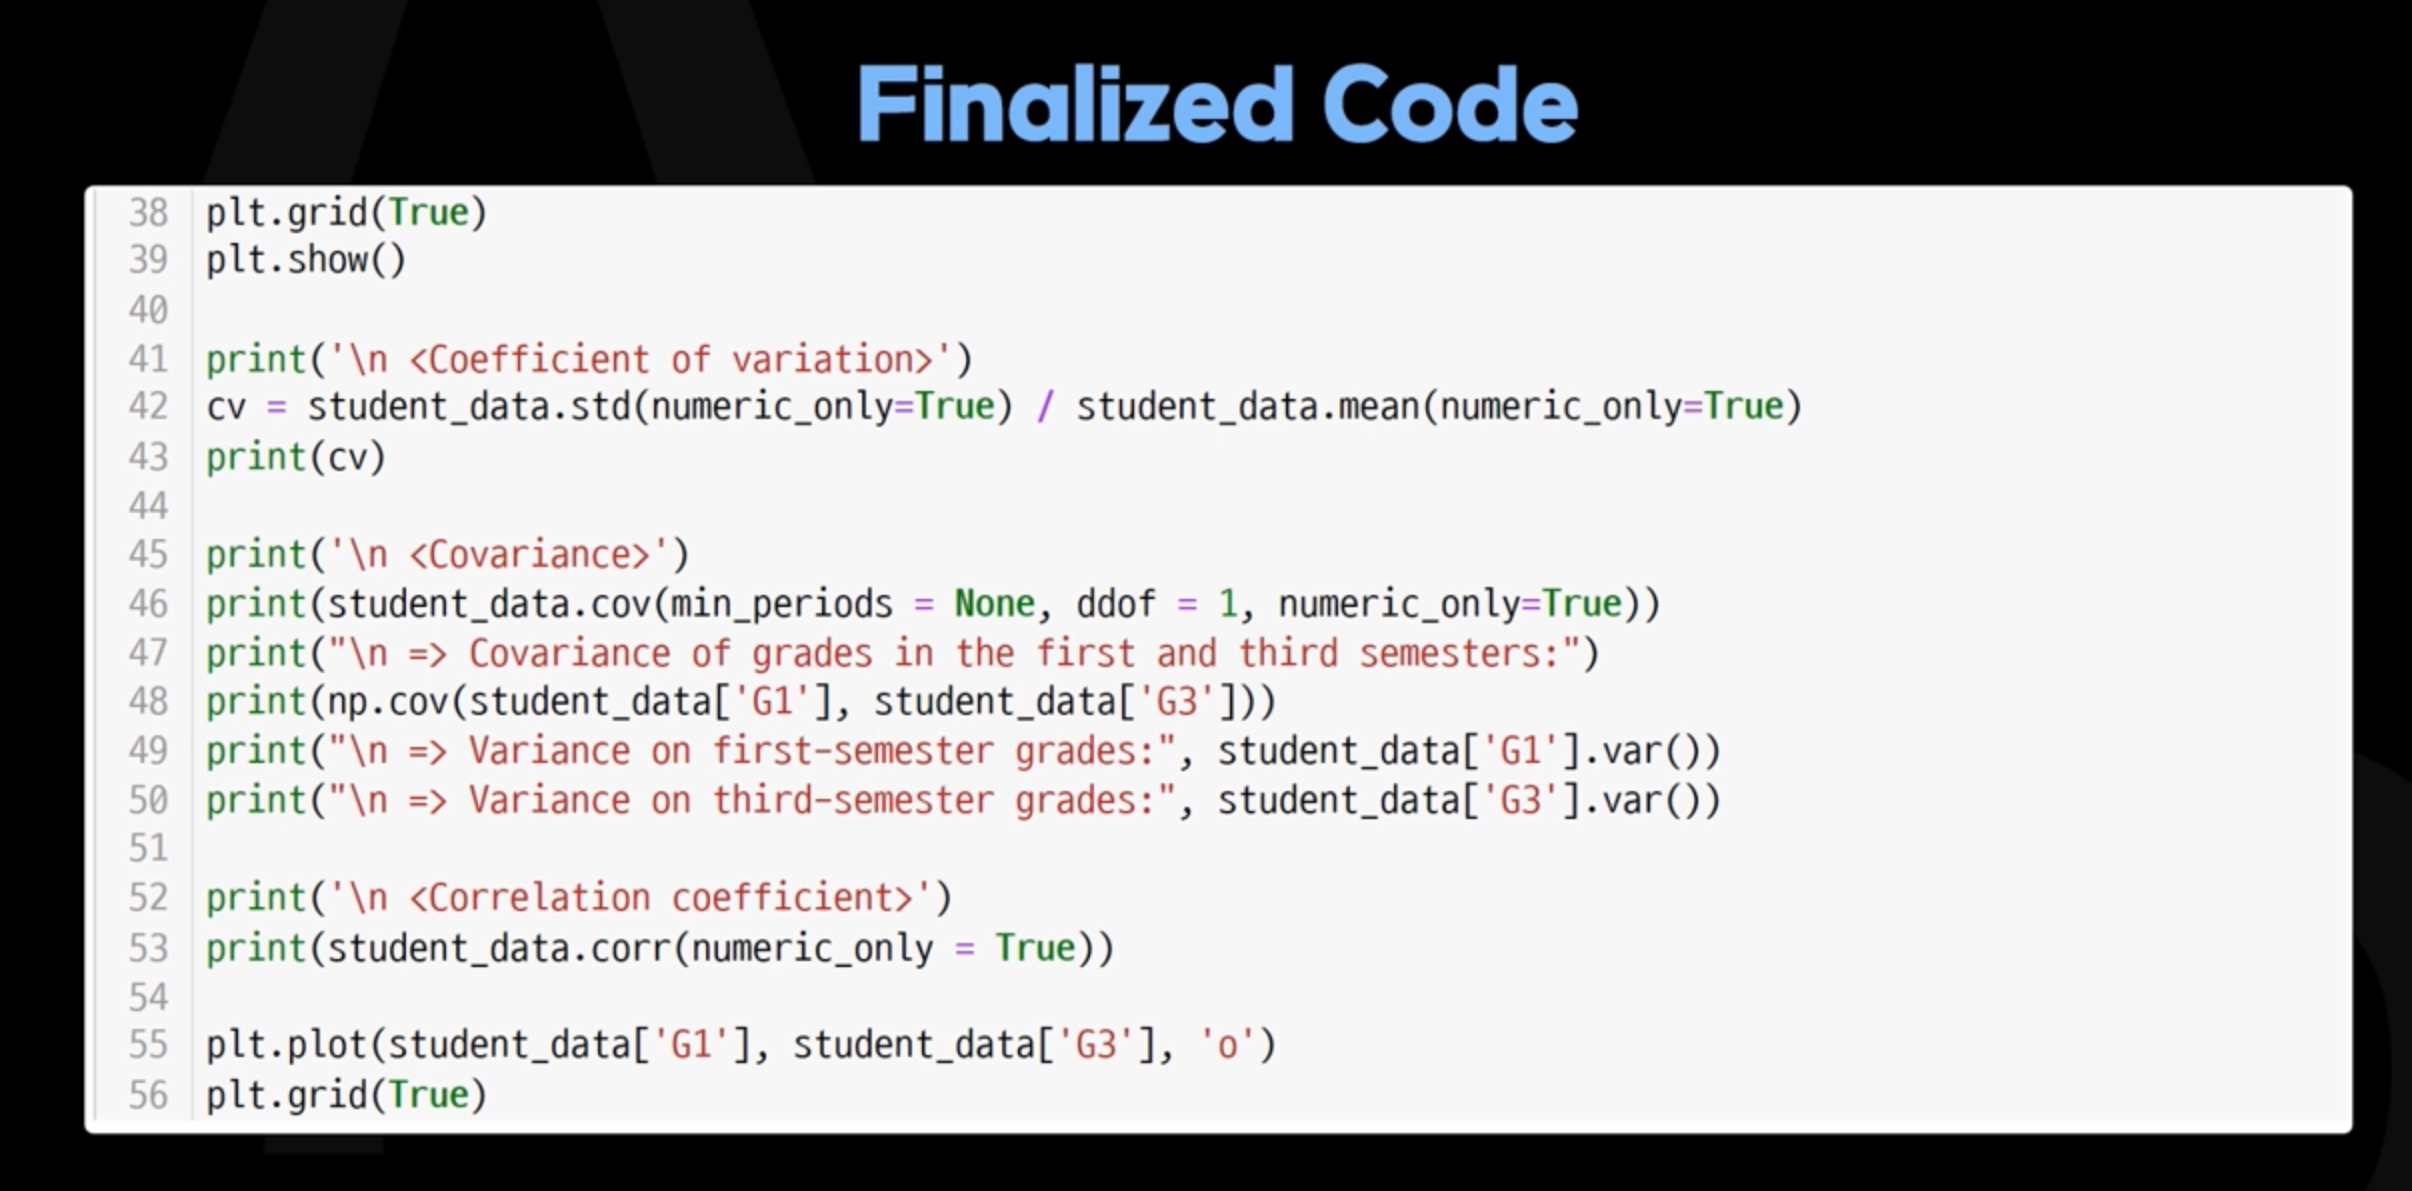

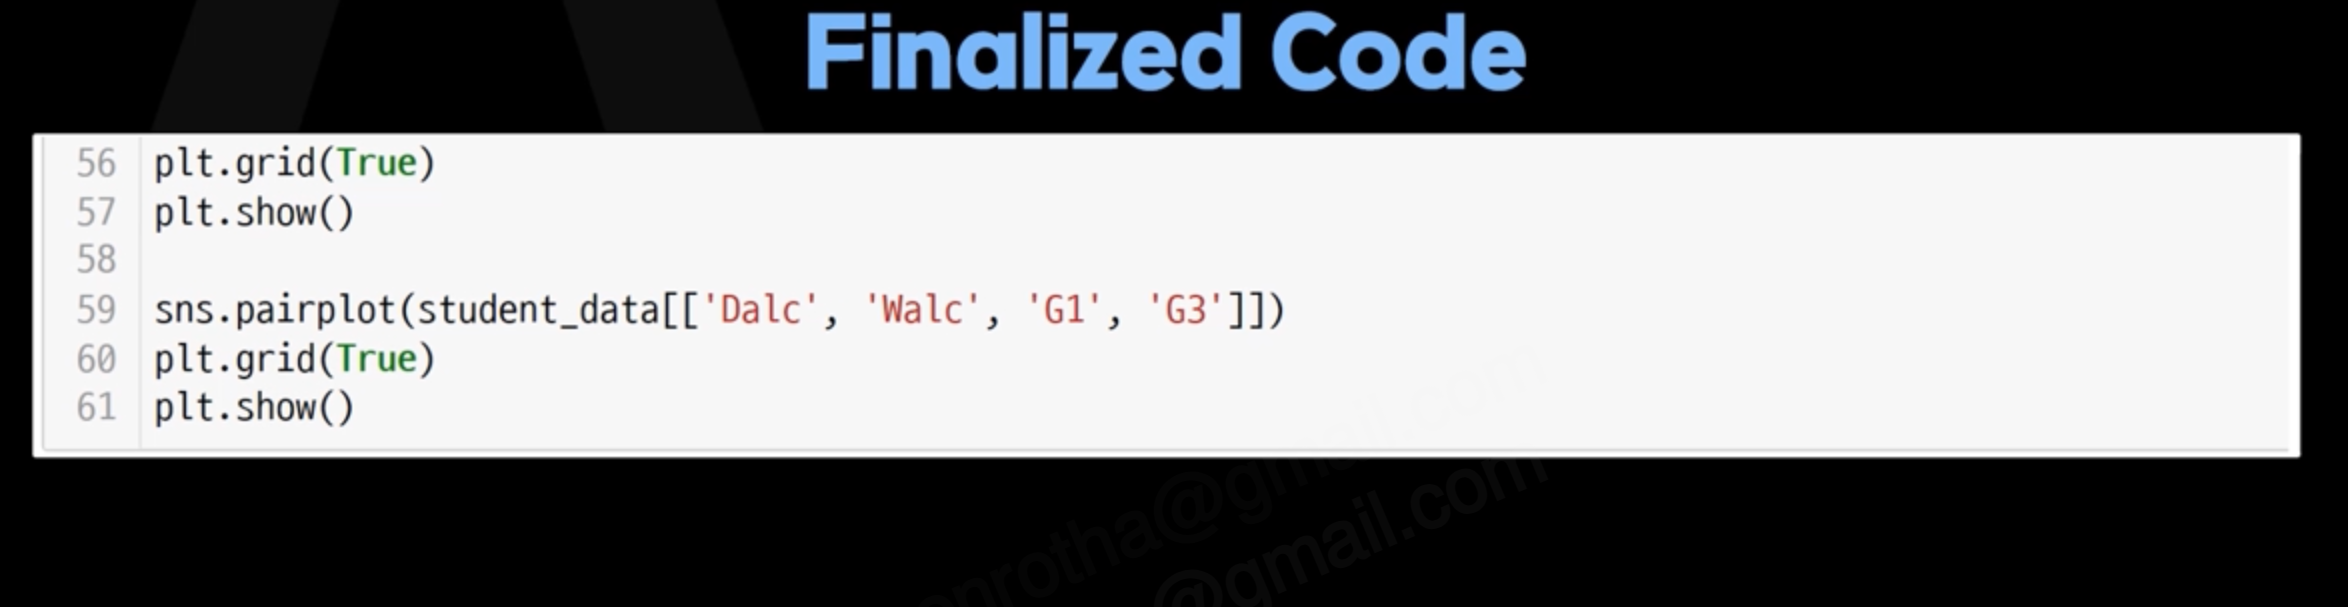


 <basic information for data>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non

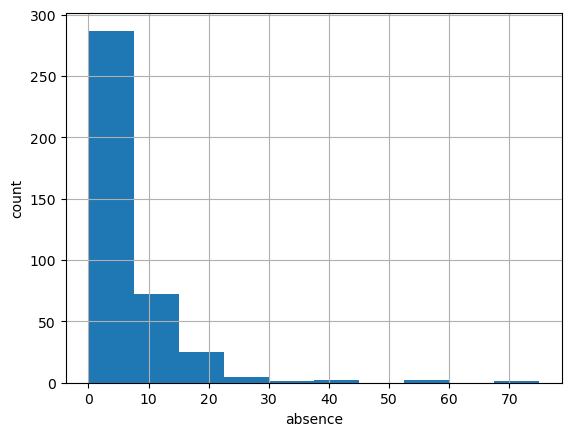

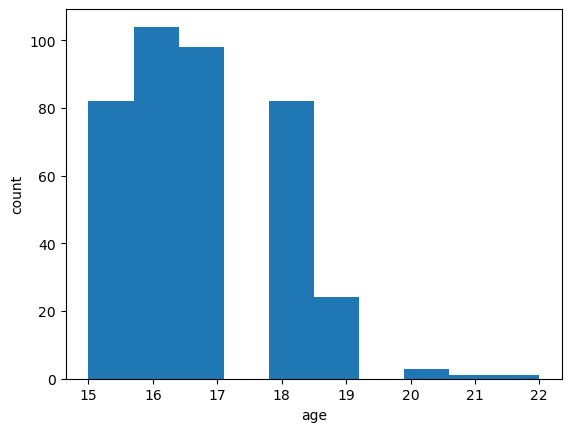


 <Technical Statistics Summary Information>
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.2911

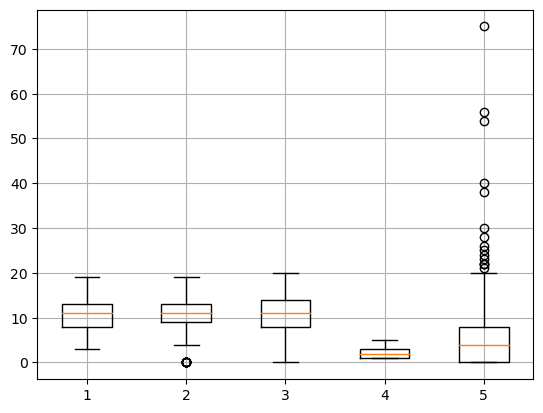


 <Coefficient of variation>


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

student_data = pd.read_csv("student-mat.csv", sep = ';')
# use sep ';' to separate the data
student_data.head()

print('\n <basic information for data>')
print(student_data.info())

print('\n <Missing data>')
print(student_data.isnull().sum())
print('\n => Total of missing data; ', student_data.isnull().sum().sum())

plt.hist(student_data['absences'])
plt.xlabel('absence')
plt.ylabel('count')

plt.grid(True)
plt.show()

plt.hist(student_data['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.show()

print('\n <Technical Statistics Summary Information>')
print(student_data.describe())
print("\n => The median of 'studytime':" , student_data['studytime'].median())
print("\n => The standard deviation of 'studytime':", student_data['studytime'].std())

plt.boxplot([student_data['G1'], student_data['G2'], student_data['G3'], \
            student_data['Walc'], student_data['absences']])


plt.grid(True)
plt.show()

print('\n <Coefficient of variation>')
cv = student_data.std(numeric_only = True) / student_data.mean(numeric_only = True)

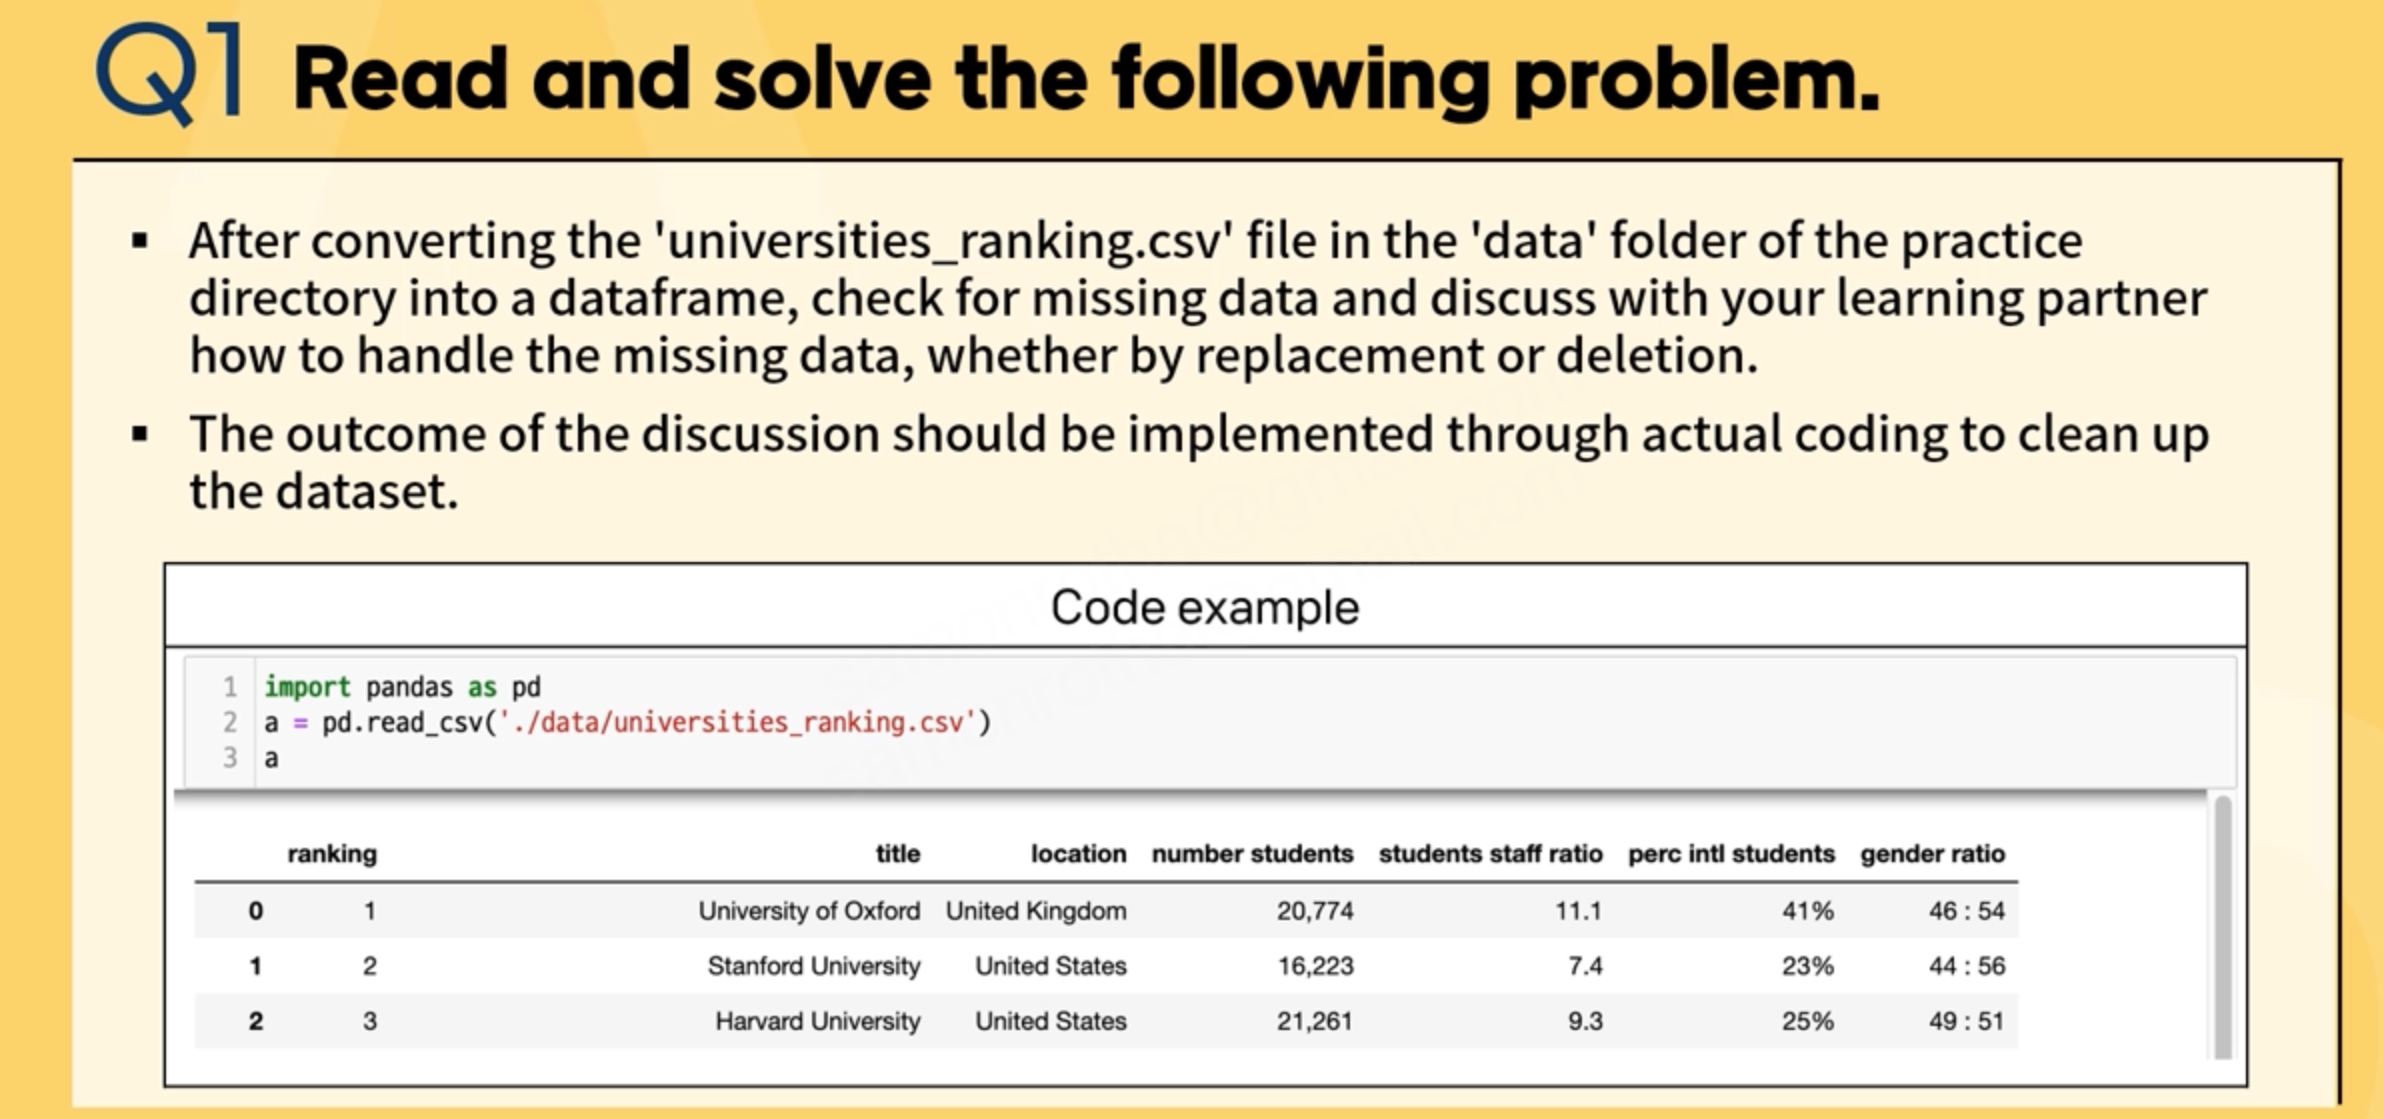

In [2]:
import pandas as pd
a = pd.read_csv("universities_ranking.csv")
a

ranking                                           title        location  \
0           1                            University of Oxford  United Kingdom   
1           2                             Stanford University   United States   
2           3                              Harvard University   United States   
3           4              California Institute of Technology   United States   
4           5           Massachusetts Institute of Technology   United States   
...       ...                                             ...             ...   
1521     1522                              Yuan Ze University          Taiwan   
1522     1523  Yuriy Fedkovych Chernivtsi National University         Ukraine   
1523     1524                              Zagazig University           Egypt   
1524     1525                            University of Zagreb         Croatia   
1525     1526                            University of Žilina        Slovakia   

     number students  students staff ratio perc intl students gender ratio  
0             20,774                  11.1                41%      46 : 54  
1             16,223                   7.4                23%      44 : 56  
2             21,261                   9.3                25%      49 : 51  
3              2,238                   6.3                33%      36 : 64  
4             11,276                   8.4                34%      39 : 61  
...              ...                   ...                ...          ...  
1521           8,188                  19.7                 7%      42 : 58  
1522          12,616                  10.7                 0%      57 : 43  
1523         156,270                  24.4                 2%      54 : 46  
1524          59,336                  15.3                 3%      59 : 41  
1525           7,136                  11.7                 2%      34 : 66  

[1526 rows x 7 columns]